### 0. Задача

Основываясь на имеющихся данных о измерениях погодных условий предсказать будет ли завтра дождь (да или нет)

In [129]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
from sklearnex import patch_sklearn # оптимизация вычислений в sklearn (повышение быстродействия)
patch_sklearn()
import sklearn                  # Алгоритмы машинного обучения

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Homework 1

### 1. Чтение данных

Датасет представляет из себя собранные в Австралии наблюдения за погодными условиями с 2008 по 2017 год

In [130]:
url = "australia_rain_tomorrow_raw.csv"
data_raw = pd.read_csv(url)

In [131]:
data_raw.shape

(142193, 24)

In [132]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [133]:
data_raw.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01/12/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02/12/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03/12/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04/12/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05/12/2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

Признаки (**Н** - номинальный, **П** - порядковый, **К** - количественный)
- `Date` - дата измерения. ДД/ММ/ГГГГ **(Н)**
- `Location` - место измерения **(Н)**
- `MinTemp` - минимальная температура за 24 часа до 9 утра. °C **(К)**
- `MaxTemp` - максимальная температура за 24 часа до 9 утра. °C **(К)**
- `Rainfall` - осадки за 24 часа до 9 утра. Миллиметры **(К)**
- `Evaporation ` - выпаривание кастрюли "класса А" за 24 часа до 9 утра. Миллиметры **(К)**
- `Sunshine ` - яркий солнечный свет за 24 часа до полуночи. Кол-во часов **(К)**
- `WindGustDir` - направление сильнейшего порыва ветра за 24 часа до полуночи **(Н)**
- `WindGustSpeed` - скорость сильнейшего порыва ветра за 24 часа до полуночи. км/ч **(К)**
- `WindDir9am` - направление ветра в среднем за 10 минут до 9 утра **(Н)**
- `WindDir3pm` - направление порыва ветра в 3 часа дня **(Н)**
- `WindSpeed9am` - скорость ветра в среднем за 10 минут до 9 утра. км/ч **(К)**
- `WindSpeed3pm` - скорость ветра в среднем за 10 минут до 3 часов дня. км/ч **(К)**
- `Humidity9am` - относительная влажность в 9 часов утра. Проценты **(К)**
- `Humidity3pm` - относительная влажность в 3 часа дня. Проценты **(К)**
- `Pressure9am` - атмосферное давление снизилось до среднего уровня моря в 9 часов утра. гПа **(К)**
- `Pressure3pm` - атмосферное давление снизилось до среднего уровня моря в 3 часа дня. гПа **(К)**
- `Сloud9am` - участок неба, затянутый облаками в 9 часов утра. Окта (0 - чисто, 8 - облачно) **(П)**
- `Сloud3pm` - участок неба, затянутый облаками в 3 часа дня. Окта (0 - чисто, 8 - облачно) **(П)**
- `Temp9am` - температура в 9 часов утра. °C **(К)**
- `Temp3pm` - температура в 3 часа дня. °C **(К)**
- `RainToday` - 1, если количество осадков за 24 часа до 9 часов утра превышает 1 мм, в противном случае 0 **(Б)**
- `RISK_MM` - непрерывная целевая переменная; количество дождя, зарегистрированное в течение следующего дня **(К)**
- `RainTomorrow` - идет дождь или нет в течение следующего дня **(Б)**

### 2. Визуализация

In [134]:
# конвертирование типа столбцов в необходимые форматы
for col in data_raw.columns:
    col_type = data_raw[col].dtype
    n_unique = len(data_raw[col].unique()) - int(data_raw['RainToday'].isnull().values.any())
    if n_unique > 2 and col_type == 'O':
        data_raw[col] = data_raw[col].astype('category')
    elif n_unique == 2 and col_type == 'O':
        data_raw[col] = [1.0 if val == 'Yes' else 0.0 for val in data_raw[col]]
        data_raw[col] = data_raw[col].astype(np.float64)

In [135]:
data_raw.dtypes

Date             category
Location         category
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday         float64
RISK_MM           float64
RainTomorrow      float64
dtype: object

In [136]:
data_raw.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  \
count  88536.000000  85099.000000  141289.000000  139467.000000   
mean       4.437189      4.503167      16.987509      21.687235   
std        2.887016      2.720633       6.492838       6.937594   
min        0.000000      0.000000      -7.200000      -5.400000   
25%        1.000000      2.000000      12.300000      16.600000   
50%        5.000000      5.000000      16.700000      21.100000   
75%        7.000000      7.000000      21.600000      26.400000   
max        9.000000      9.000000      40.200000      46.700000   

           RainToday        RISK_MM   RainTomorrow  
count  142193.000000  142193.000000  142193.000000  
mean        0.221213       2.360682       0.224181  
std         0.415065       8.477969       0.417043  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.800000       0.000000  
max         1.000000     371.000000       1.000000

In [137]:
data_raw.describe(include=['category'])

Date  Location WindGustDir WindDir9am WindDir3pm
count       142193    142193      132863     132180     138415
unique        3436        49          16         16         16
top     17/09/2014  Canberra           W          N         SE
freq            49      3418        9780      11393      10663

In [138]:
# соотношение классов в бинарных признаках
print(data_raw.value_counts(subset=['RainToday'], normalize=True),
data_raw.value_counts(subset=['RainTomorrow'], normalize=True), sep = '\n\n')

RainToday
0.0          0.778787
1.0          0.221213
dtype: float64

RainTomorrow
0.0             0.775819
1.0             0.224181
dtype: float64


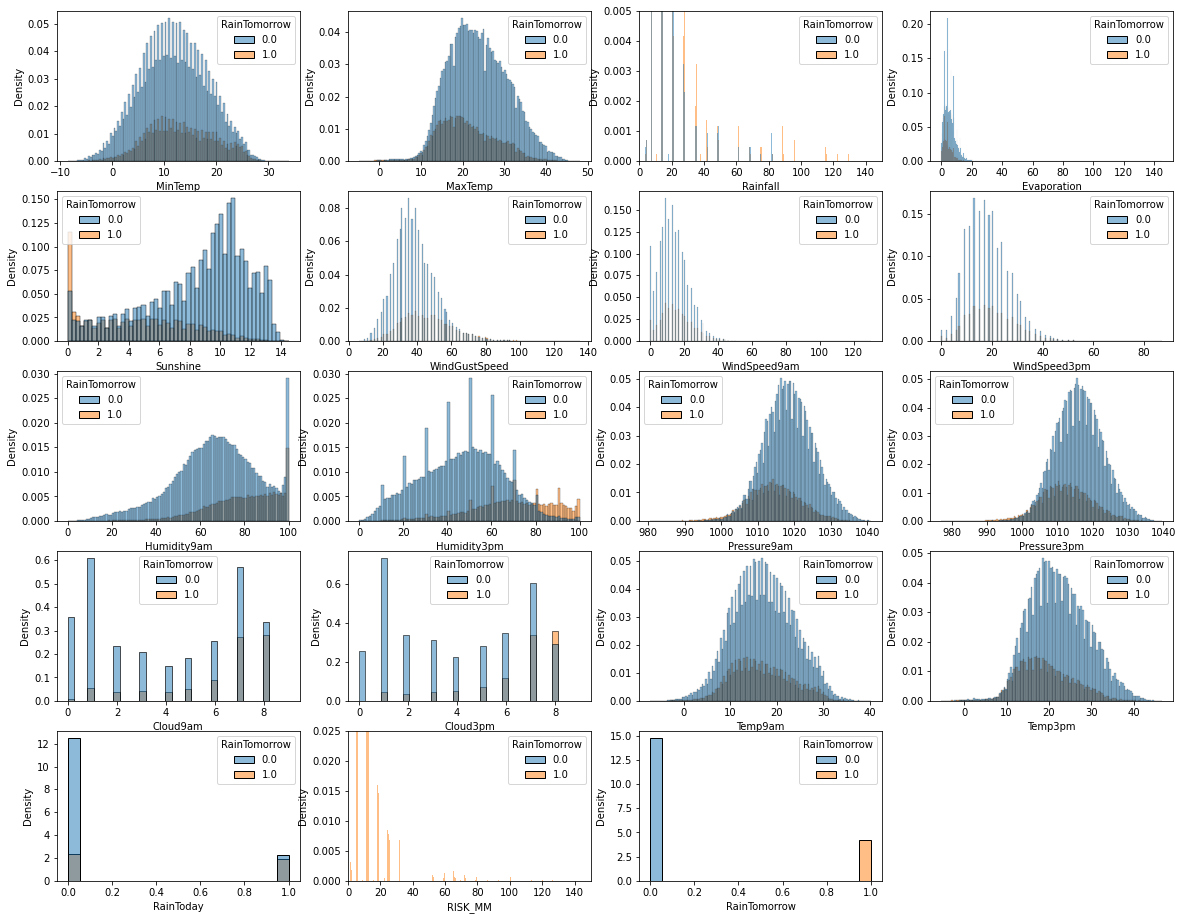

In [11]:
cols = data_raw.select_dtypes(include=[np.number]).columns
n_rows = int(np.sqrt(len(cols)) + 1)
n_cols = len(cols) // n_rows + 1
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_rows*4, n_cols*4))
for i, col in enumerate(cols):
    sns.histplot(data_raw, x=col, ax=axes[i // n_cols, i % n_cols], stat='density', hue='RainTomorrow')
    # фиксирование интервала для более понятного отображения
    if col == 'Rainfall':
        axes[i // n_cols, i % n_cols].set_ylim(0, 0.005)
        axes[i // n_cols, i % n_cols].set_xlim(0, 150)
    elif col == 'RISK_MM':
        axes[i // n_cols, i % n_cols].set_ylim(0, 0.025)
        axes[i // n_cols, i % n_cols].set_xlim(0, 150)
# удаление пустых графиков в последней строке
for i in range(len(cols), n_rows*n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

Согласно построенным графикам распределения, делая поправку на несбалансированность классов, можно сказать, что на таргетную переменную определенно влияют признаки `Rainfall`, `Sunshine`, `WindGustSpeed`, `Humidity`, `Cloud` 

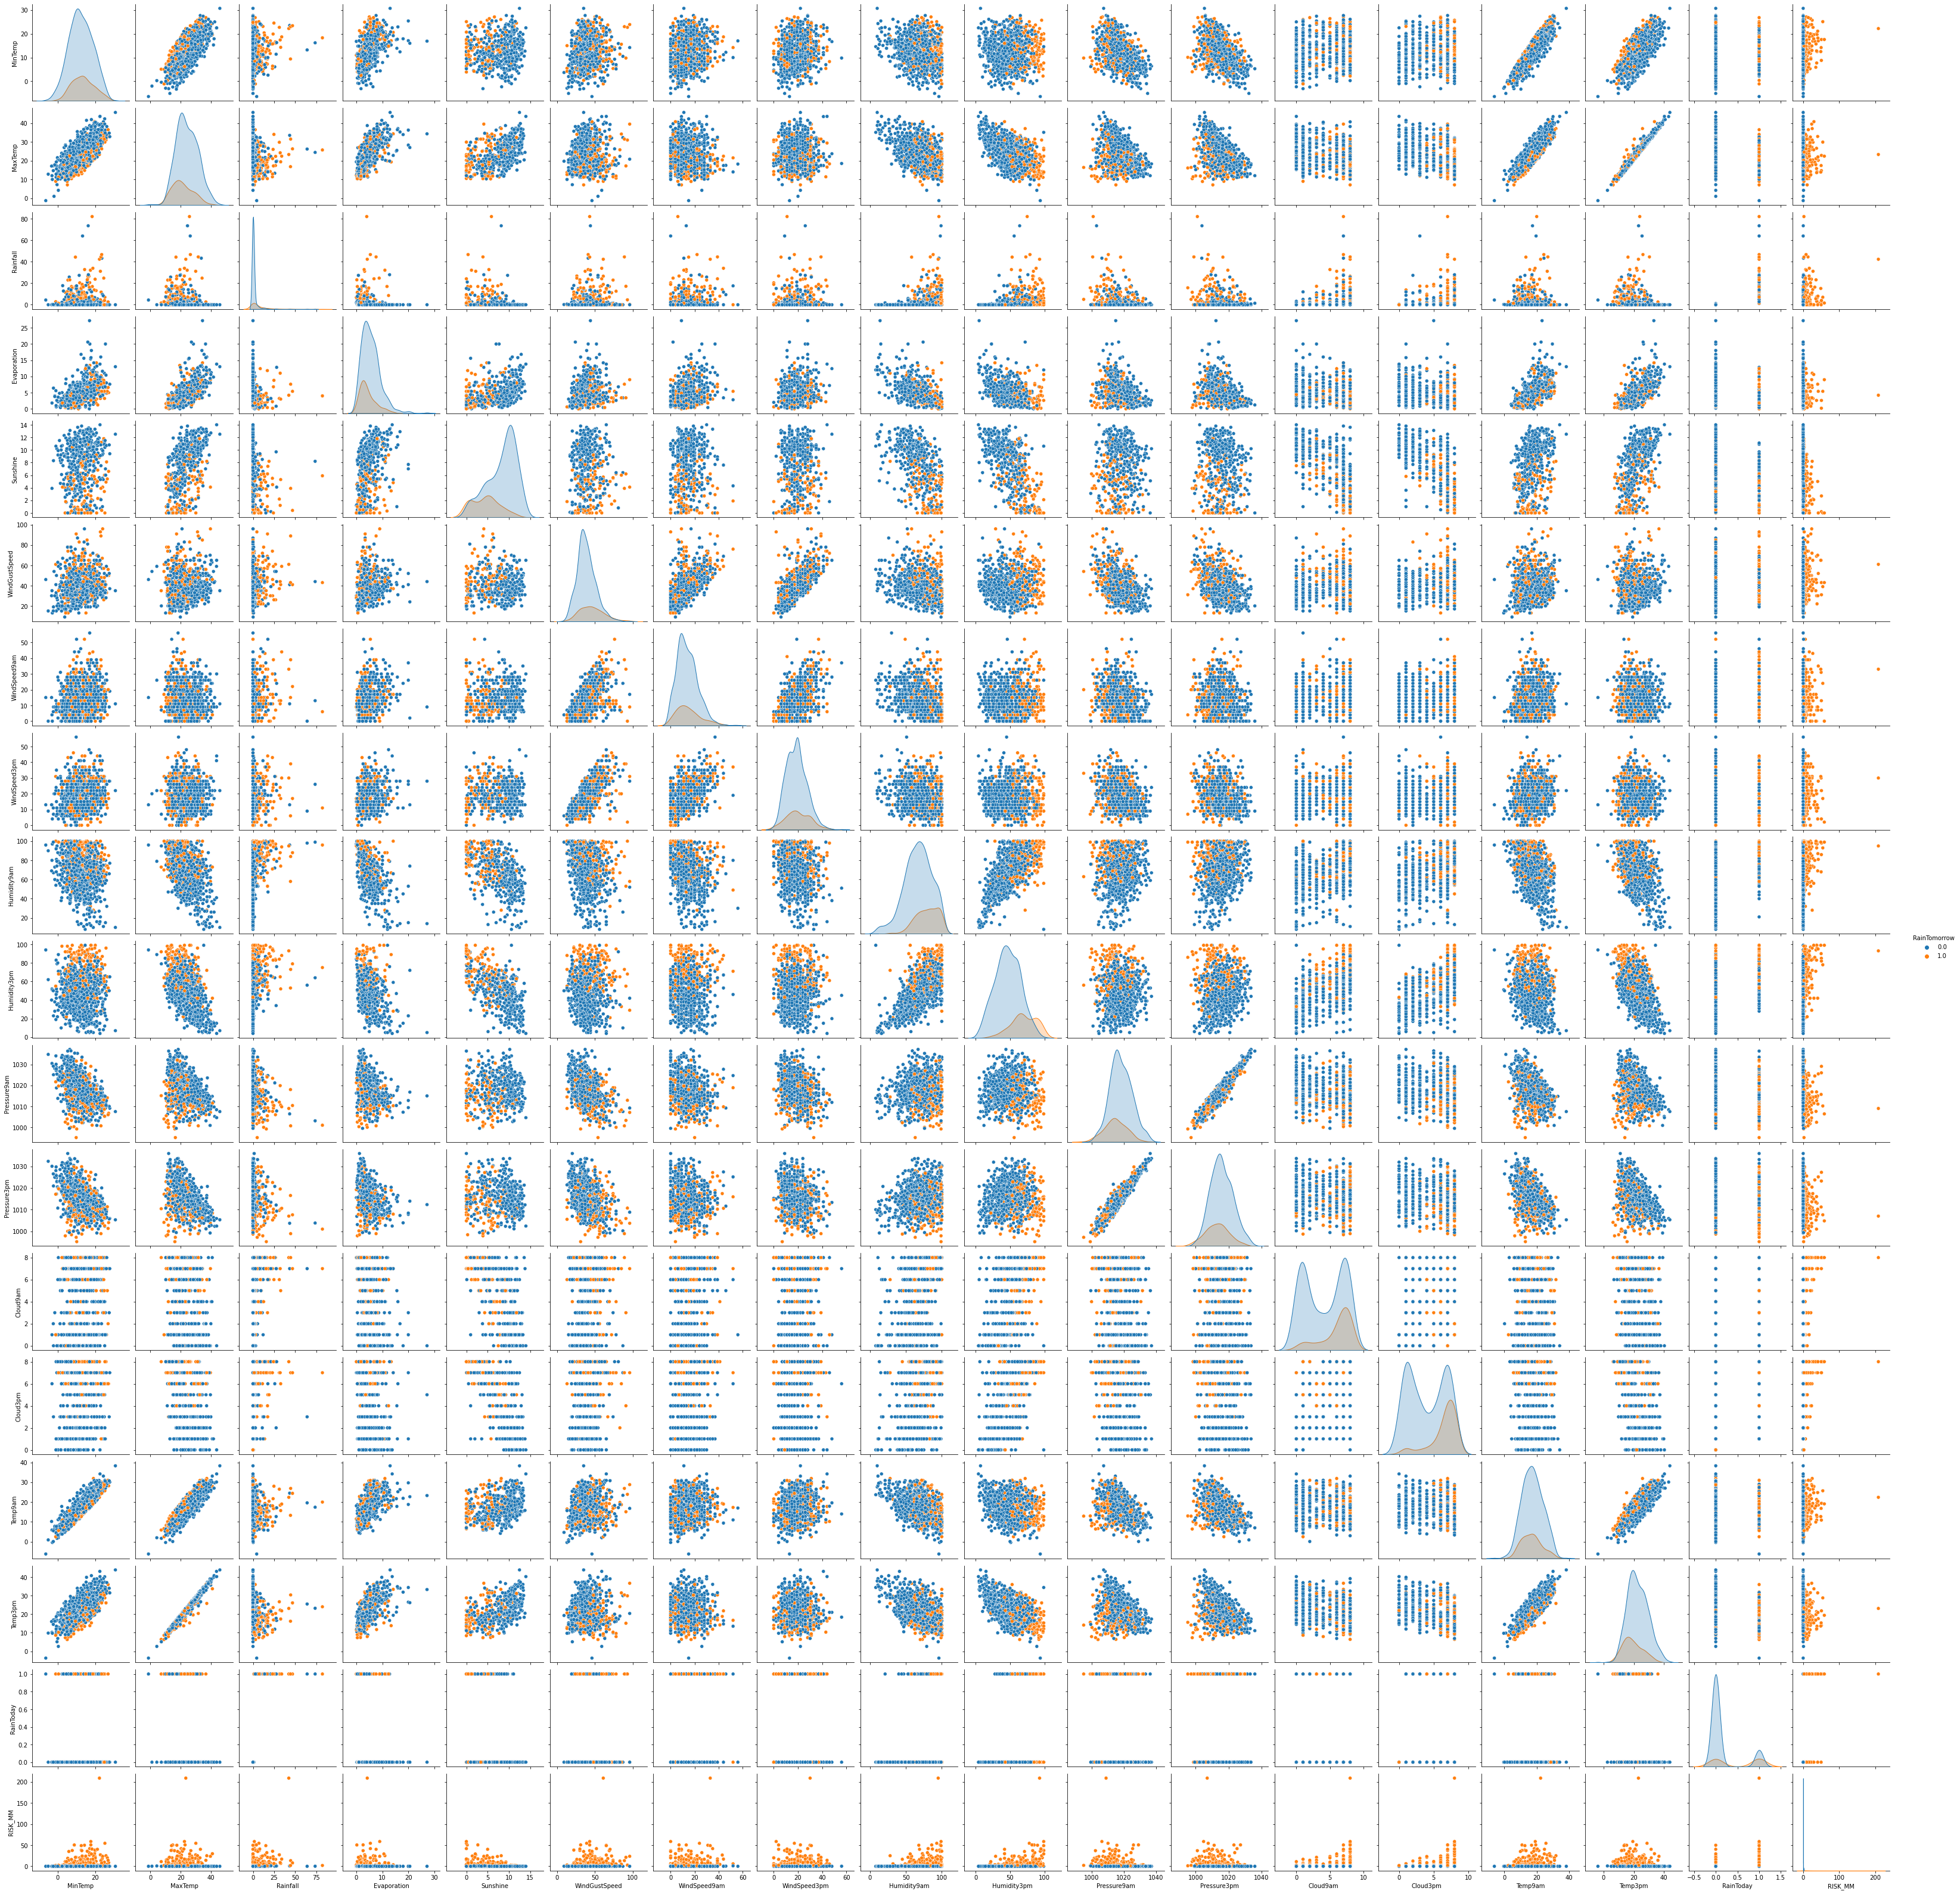

In [12]:
sns.pairplot(data_raw.sample(1000), hue='RainTomorrow')

В силу длительности вычислений вместо целого датасета был использован его семпл в 1000 объектов. Из диаграмм рассеивания можно сделать вывод, что признак `RISK_MM` оказывает сильное влияние на определение таргетной переменной

<AxesSubplot:>

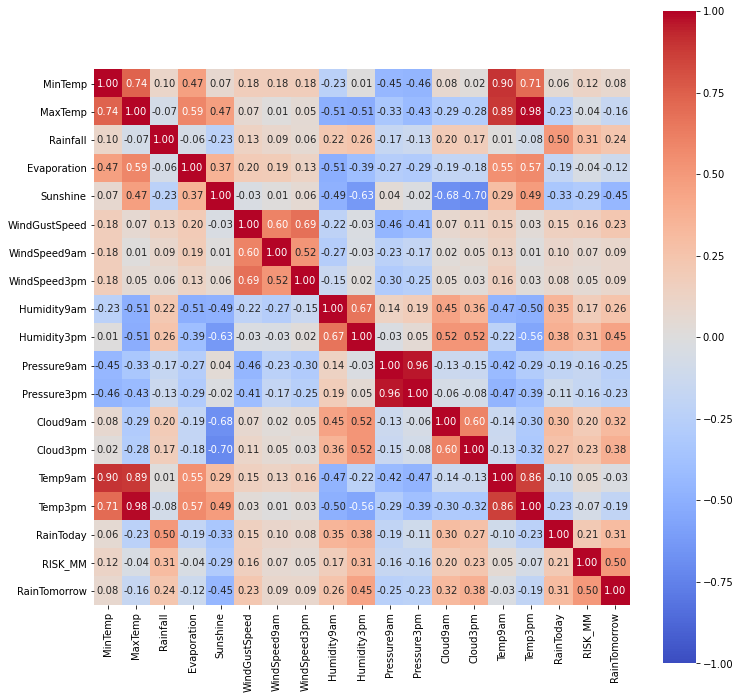

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data_raw.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f', ax=ax, square=True)

По корреляционной матрице можно сказать, что на таргетную переменную также влияют признаки `Pressure` и `RainToday`

#### Вывод

На таргетную переменную оказывают достаточное влияние признаки `Rainfall`, `Sunshine`, `WindGustSpeed`, `Humidity`, `Cloud`, `RISK_MM`, `Pressure` и `RainToday`<br>
11 признаков из 23

### 3. Пропущенные значения

In [139]:
for col in data_raw.columns:
    m_vals = data_raw[col].isnull().sum()
    p_m_vals = m_vals / data_raw.shape[0]
    print(col, m_vals, "{:.3f}".format(p_m_vals))

Date 0 0.000
Location 0 0.000
MinTemp 637 0.004
MaxTemp 322 0.002
Rainfall 1406 0.010
Evaporation 60843 0.428
Sunshine 67816 0.477
WindGustDir 9330 0.066
WindGustSpeed 9270 0.065
WindDir9am 10013 0.070
WindDir3pm 3778 0.027
WindSpeed9am 1348 0.009
WindSpeed3pm 2630 0.018
Humidity9am 1774 0.012
Humidity3pm 3610 0.025
Pressure9am 14014 0.099
Pressure3pm 13981 0.098
Cloud9am 53657 0.377
Cloud3pm 57094 0.402
Temp9am 904 0.006
Temp3pm 2726 0.019
RainToday 0 0.000
RISK_MM 0 0.000
RainTomorrow 0 0.000


Удалим объекты, в признаках которых имеется меньше 5 % пропущенных значений

In [140]:
data = data_raw.copy()
for col in data.columns:
    m_vals = data[col].isnull().sum()
    p_m_vals = m_vals / data_raw.shape[0]
    if p_m_vals <= 0.05:
        data = data.dropna(subset=[col], axis=0)

In [141]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      56101
Sunshine         61854
WindGustDir       6014
WindGustSpeed     6001
WindDir9am        7557
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11215
Pressure3pm      11151
Cloud9am         50169
Cloud3pm         51552
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [142]:
data.shape

(134590, 24)

Построим график плотности пропущенных значений на датасете

<AxesSubplot:>

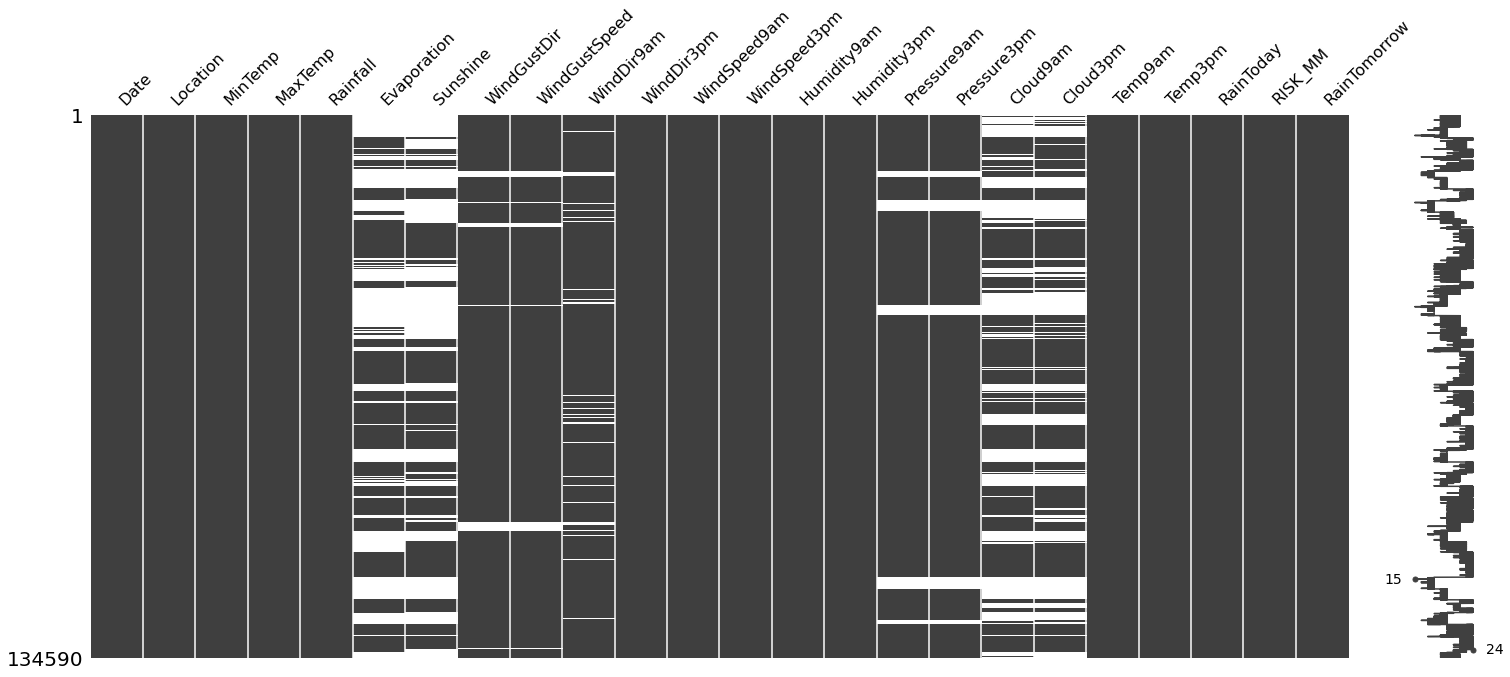

In [15]:
import missingno as msno
msno.matrix(data)

Отобразим график, отсортированный по признаку с наибольшим количеством пропущенных значений (`Sunshine`)

<AxesSubplot:>

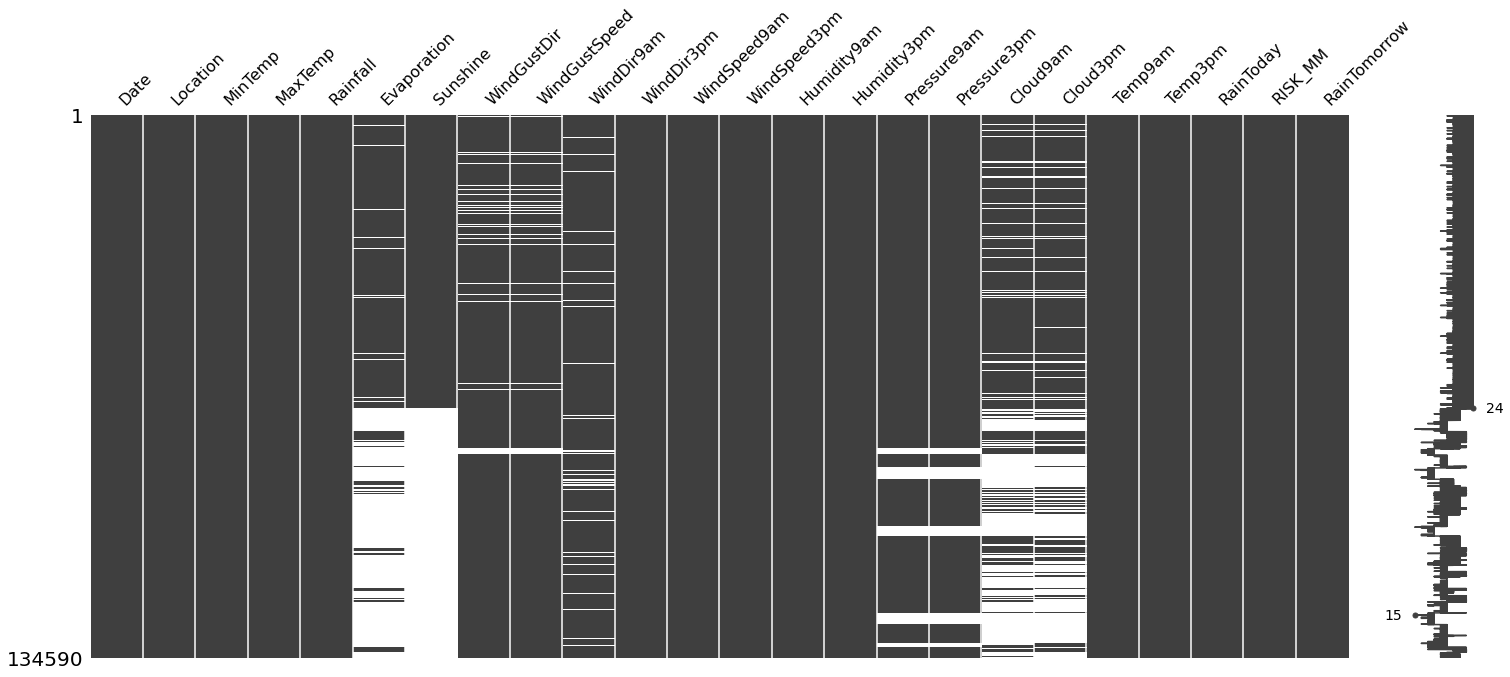

In [19]:
sorted_mv = data.sort_values('Sunshine')
msno.matrix(sorted_mv)

Из построенного графика можно отметить, что `Sunshine` и `Evaporation` тесно связаны друг с другом (прослеживается зависимость в пропущенных значениях). Также прослеживается зависимость между `WindGustDir`, `WindGustSpeed` и `Pressure9am`, `Pressure3pm`

<AxesSubplot:>

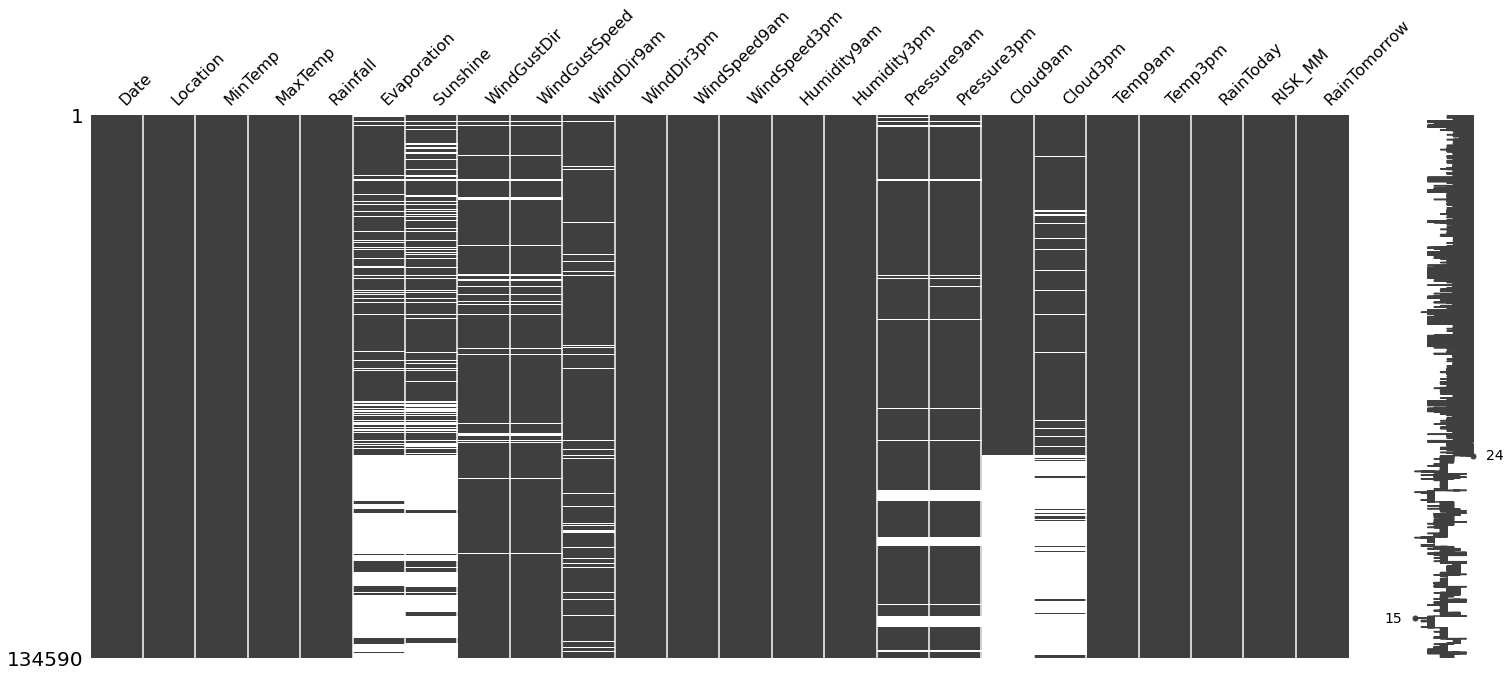

In [20]:
sorted_mv = data.sort_values('Cloud9am')
msno.matrix(sorted_mv)

В признаках `Cloud9am` и `Cloud3pm`, также прослеживается зависимость между собой и с признаками `Evaporation` и `Sunshine`

Для подтверждения вышесказанного, построим heatmap зависимостей пропущенных величин

<AxesSubplot:>

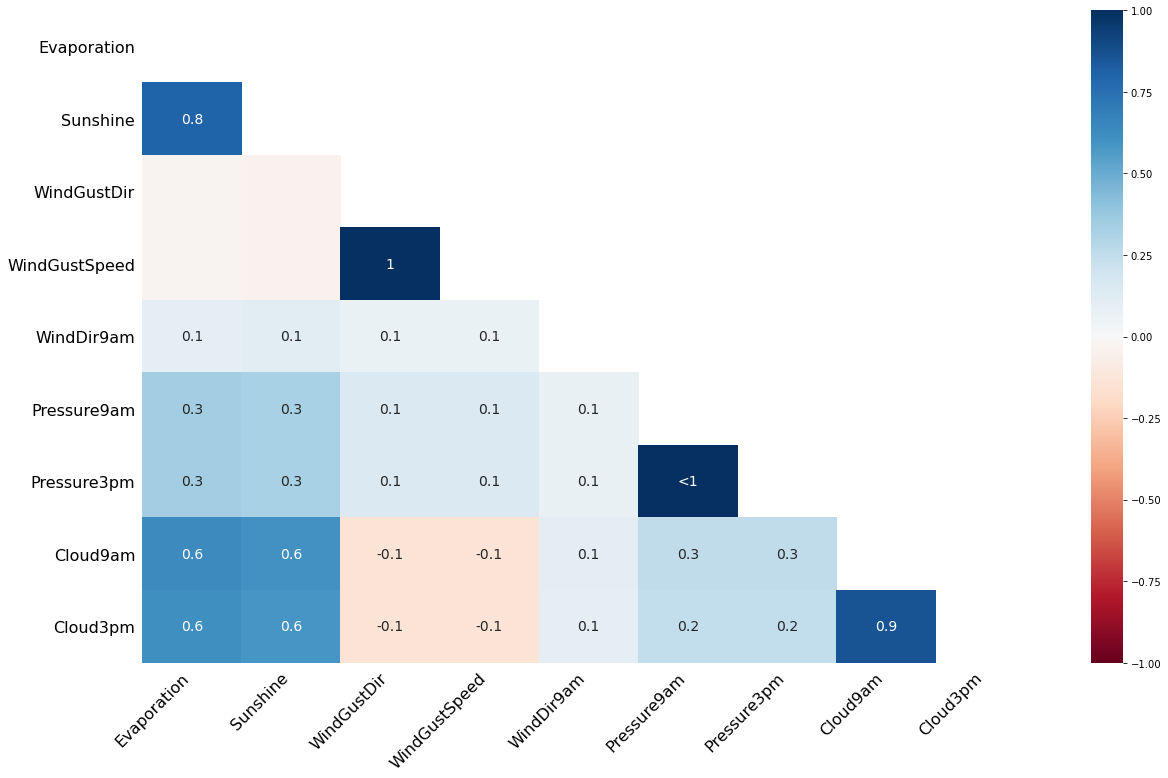

In [21]:
msno.heatmap(data)

А также дендрограмму для более подробного группового анализа зависимостей

<AxesSubplot:>

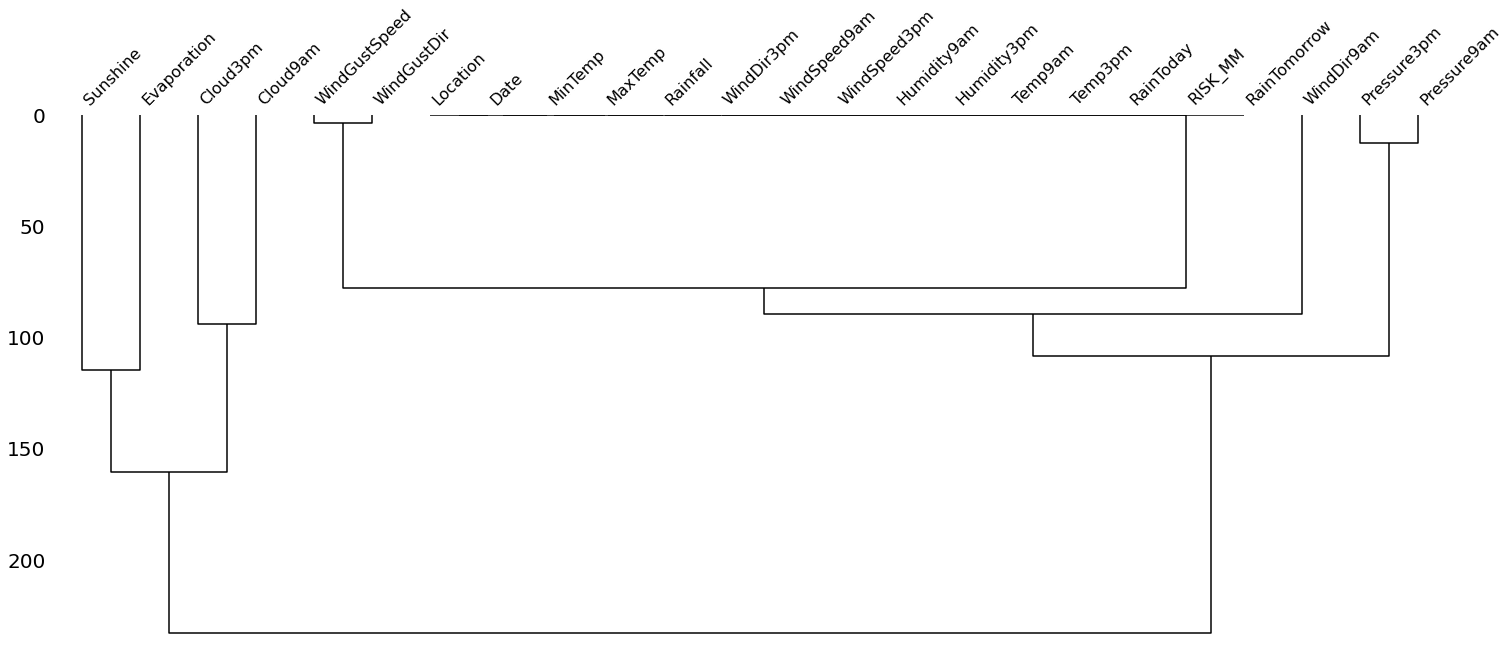

In [22]:
msno.dendrogram(data)

Исходя из построенных графиков, можно сделать вывод, что большинство пропущенных значений отсутствуют в связи с `MNAR` - missing not at random (отсутствующие данные зависят от ненаблюдаемых данных или значений самих отсутствующих данных)

Так как в данном случае пропущенные значения относятся к типу `MNAR`, а данные являются временными рядами (обозревание погодных условий в течение нескольких лет в Австралии с наличием дат выполненных измерений), то обработка пропущенных значений будет выполнена после пункта конвертации категориальных переменных (в силу наличия необходимости их перевода в цифровые для работы алгоритма `KNN imputer`). Заполнение пропущенных значений для категориальных признаков будет выполнено в текущем пункте

In [143]:
data.select_dtypes(include=['category']).isnull().sum()

Date              0
Location          0
WindGustDir    6014
WindDir9am     7557
WindDir3pm        0
dtype: int64

Заполним наиболее популярным значением (модой) пропущенные значения в категориальных признаках

In [144]:
cat_cols = data.select_dtypes(include=['category']).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [145]:
data.select_dtypes(include=['category']).isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

### 4. Категориальные признаки

In [146]:
cat_cols = data.select_dtypes(include=['category']).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Конвертируем дату в дни, месяцы, года, с цикличным отображением первых двух

In [147]:
from datetime import datetime

In [148]:
day_sin = []
day_cos = []
month_sin = []
month_cos = []
year = []
for date in data['Date']:
    f_date = datetime.strptime(date, '%d/%m/%Y')
    day_sin.append(np.sin(2 * np.pi * f_date.timetuple().tm_yday/365.0))
    day_cos.append(np.cos(2 * np.pi * f_date.timetuple().tm_yday/365.0))
    month_sin.append(np.sin(2 * np.pi * f_date.month/12.0))
    month_cos.append(np.cos(2 * np.pi * f_date.month/12.0))
    year.append(f_date.year)
new_date = pd.DataFrame({'day_sin': day_sin, 'day_cos': day_cos, 'month_sin': month_sin, 'month_cos': month_cos, 'year': year})
new_date

day_sin   day_cos     month_sin  month_cos  year
0      -0.478734  0.877960 -2.449294e-16        1.0  2008
1      -0.463550  0.886071 -2.449294e-16        1.0  2008
2      -0.448229  0.893919 -2.449294e-16        1.0  2008
3      -0.432776  0.901502 -2.449294e-16        1.0  2008
4      -0.417194  0.908818 -2.449294e-16        1.0  2008
...          ...       ...           ...        ...   ...
134585  0.196673 -0.980469  1.224647e-16       -1.0  2017
134586  0.179767 -0.983709  1.224647e-16       -1.0  2017
134587  0.162807 -0.986658  1.224647e-16       -1.0  2017
134588  0.145799 -0.989314  1.224647e-16       -1.0  2017
134589  0.128748 -0.991677  1.224647e-16       -1.0  2017

[134590 rows x 5 columns]

In [149]:
data.insert(0, 'year', year)
data.insert(0, 'month_cos', month_cos)
data.insert(0, 'month_sin', month_sin)
data.insert(0, 'day_cos', day_cos)
data.insert(0, 'day_sin', day_sin)
data.head()

day_sin   day_cos     month_sin  month_cos  year        Date Location  \
0 -0.478734  0.877960 -2.449294e-16        1.0  2008  01/12/2008   Albury   
1 -0.463550  0.886071 -2.449294e-16        1.0  2008  02/12/2008   Albury   
2 -0.448229  0.893919 -2.449294e-16        1.0  2008  03/12/2008   Albury   
3 -0.432776  0.901502 -2.449294e-16        1.0  2008  04/12/2008   Albury   
4 -0.417194  0.908818 -2.449294e-16        1.0  2008  05/12/2008   Albury   

   MinTemp  MaxTemp  Rainfall  ...  Humidity3pm  Pressure9am Pressure3pm  \
0     13.4     22.9       0.6  ...         22.0       1007.7      1007.1   
1      7.4     25.1       0.0  ...         25.0       1010.6      1007.8   
2     12.9     25.7       0.0  ...         30.0       1007.6      1008.7   
3      9.2     28.0       0.0  ...         16.0       1017.6      1012.8   
4     17.5     32.3       1.0  ...         33.0       1010.8      1006.0   

   Cloud9am Cloud3pm Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0       8.0      NaN    16.9     21.8        0.0      0.0           0.0  
1       NaN      NaN    17.2     24.3        0.0      0.0           0.0  
2       NaN      2.0    21.0     23.2        0.0      0.0           0.0  
3       NaN      NaN    18.1     26.5        0.0      1.0           0.0  
4       7.0      8.0    17.8     29.7        0.0      0.2           0.0  

[5 rows x 29 columns]

In [150]:
data_fixed = data.copy(deep=True)
data_date = data['Date']
data = data.drop('Date', axis=1)

In [119]:
data.head()

day_sin   day_cos     month_sin  month_cos  year Location  MinTemp  \
0 -0.478734  0.877960 -2.449294e-16        1.0  2008   Albury     13.4   
1 -0.463550  0.886071 -2.449294e-16        1.0  2008   Albury      7.4   
2 -0.448229  0.893919 -2.449294e-16        1.0  2008   Albury     12.9   
3 -0.432776  0.901502 -2.449294e-16        1.0  2008   Albury      9.2   
4 -0.417194  0.908818 -2.449294e-16        1.0  2008   Albury     17.5   

   MaxTemp  Rainfall  Evaporation  ...  Humidity3pm Pressure9am  Pressure3pm  \
0     22.9       0.6          NaN  ...         22.0      1007.7       1007.1   
1     25.1       0.0          NaN  ...         25.0      1010.6       1007.8   
2     25.7       0.0          NaN  ...         30.0      1007.6       1008.7   
3     28.0       0.0          NaN  ...         16.0      1017.6       1012.8   
4     32.3       1.0          NaN  ...         33.0      1010.8       1006.0   

  Cloud9am Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0      8.0      NaN     16.9     21.8        0.0      0.0           0.0  
1      NaN      NaN     17.2     24.3        0.0      0.0           0.0  
2      NaN      2.0     21.0     23.2        0.0      0.0           0.0  
3      NaN      NaN     18.1     26.5        0.0      1.0           0.0  
4      7.0      8.0     17.8     29.7        0.0      0.2           0.0  

[5 rows x 28 columns]

In [120]:
cat_cols = data.select_dtypes(include=['category']).columns

In [121]:
cat_cols.values

array(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype=object)

In [122]:
data.describe(include='category').loc['unique', :]

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
Name: unique, dtype: object

Так как данные признаки содержат номинальные (непорядковые) значения, то используем `OneHotEncoding`

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe_res = pd.DataFrame()
for col in cat_cols:
    ohe = OneHotEncoder()
    ohe_res = pd.concat([ohe_res, 
                         pd.DataFrame(
                             ohe.fit_transform(data[[col]]).toarray(), 
                             columns=[col + ' ' + str(i) for i in range(len(data[col].unique()))])], 
                        axis=1)
ohe_res

Location 0  Location 1  Location 2  Location 3  Location 4  \
0              0.0         0.0         1.0         0.0         0.0   
1              0.0         0.0         1.0         0.0         0.0   
2              0.0         0.0         1.0         0.0         0.0   
3              0.0         0.0         1.0         0.0         0.0   
4              0.0         0.0         1.0         0.0         0.0   
...            ...         ...         ...         ...         ...   
134585         0.0         0.0         0.0         0.0         0.0   
134586         0.0         0.0         0.0         0.0         0.0   
134587         0.0         0.0         0.0         0.0         0.0   
134588         0.0         0.0         0.0         0.0         0.0   
134589         0.0         0.0         0.0         0.0         0.0   

        Location 5  Location 6  Location 7  Location 8  Location 9  ...  \
0              0.0         0.0         0.0         0.0         0.0  ...   
1              0.0         0.0         0.0         0.0         0.0  ...   
2              0.0         0.0         0.0         0.0         0.0  ...   
3              0.0         0.0         0.0         0.0         0.0  ...   
4              0.0         0.0         0.0         0.0         0.0  ...   
...            ...         ...         ...         ...         ...  ...   
134585         0.0         0.0         0.0         0.0         0.0  ...   
134586         0.0         0.0         0.0         0.0         0.0  ...   
134587         0.0         0.0         0.0         0.0         0.0  ...   
134588         0.0         0.0         0.0         0.0         0.0  ...   
134589         0.0         0.0         0.0         0.0         0.0  ...   

        WindDir3pm 6  WindDir3pm 7  WindDir3pm 8  WindDir3pm 9  WindDir3pm 10  \
0                0.0           0.0           0.0           0.0            0.0   
1                0.0           0.0           0.0           0.0            0.0   
2                0.0           0.0           0.0           0.0            0.0   
3                0.0           0.0           0.0           0.0            0.0   
4                0.0           1.0           0.0           0.0            0.0   
...              ...           ...           ...           ...            ...   
134585           0.0           0.0           0.0           0.0            0.0   
134586           0.0           0.0           0.0           0.0            0.0   
134587           0.0           0.0           0.0           0.0            0.0   
134588           0.0           0.0           0.0           0.0            0.0   
134589           0.0           0.0           0.0           0.0            0.0   

        WindDir3pm 11  WindDir3pm 12  WindDir3pm 13  WindDir3pm 14  \
0                 0.0            0.0            0.0            1.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
134585            0.0            0.0            0.0            0.0   
134586            0.0            0.0            0.0            0.0   
134587            0.0            0.0            0.0            0.0   
134588            0.0            0.0            0.0            1.0   
134589            0.0            0.0            0.0            0.0   

        WindDir3pm 15  
0                 0.0  
1                 1.0  
2                 1.0  
3                 0.0  
4                 0.0  
...               ...  
134585            0.0  
134586            0.0  
134587            0.0  
134588            0.0  
134589            0.0  

[134590 rows x 97 columns]

In [28]:
ohe_res.shape

(134590, 97)

In [29]:
data_transfromed = data.copy(deep=True)
data_transformed = pd.concat([data_transfromed.reset_index(), ohe_res.reset_index()], axis=1)

In [30]:
data_transformed.shape

(134590, 127)

In [31]:
data_transformed.head()

index   day_sin   day_cos     month_sin  month_cos  year Location  MinTemp  \
0      0 -0.478734  0.877960 -2.449294e-16        1.0  2008   Albury     13.4   
1      1 -0.463550  0.886071 -2.449294e-16        1.0  2008   Albury      7.4   
2      2 -0.448229  0.893919 -2.449294e-16        1.0  2008   Albury     12.9   
3      3 -0.432776  0.901502 -2.449294e-16        1.0  2008   Albury      9.2   
4      4 -0.417194  0.908818 -2.449294e-16        1.0  2008   Albury     17.5   

   MaxTemp  Rainfall  ...  WindDir3pm 6  WindDir3pm 7 WindDir3pm 8  \
0     22.9       0.6  ...           0.0           0.0          0.0   
1     25.1       0.0  ...           0.0           0.0          0.0   
2     25.7       0.0  ...           0.0           0.0          0.0   
3     28.0       0.0  ...           0.0           0.0          0.0   
4     32.3       1.0  ...           0.0           1.0          0.0   

   WindDir3pm 9 WindDir3pm 10 WindDir3pm 11  WindDir3pm 12  WindDir3pm 13  \
0           0.0           0.0           0.0            0.0            0.0   
1           0.0           0.0           0.0            0.0            0.0   
2           0.0           0.0           0.0            0.0            0.0   
3           0.0           0.0           0.0            0.0            0.0   
4           0.0           0.0           0.0            0.0            0.0   

   WindDir3pm 14  WindDir3pm 15  
0            1.0            0.0  
1            0.0            1.0  
2            0.0            1.0  
3            0.0            0.0  
4            0.0            0.0  

[5 rows x 127 columns]

In [32]:
data_transformed = data_transformed.drop('index', axis=1)

In [33]:
data_transformed = data_transformed.drop(cat_cols, axis=1)

In [34]:
data_transformed.head()

day_sin   day_cos     month_sin  month_cos  year  MinTemp  MaxTemp  \
0 -0.478734  0.877960 -2.449294e-16        1.0  2008     13.4     22.9   
1 -0.463550  0.886071 -2.449294e-16        1.0  2008      7.4     25.1   
2 -0.448229  0.893919 -2.449294e-16        1.0  2008     12.9     25.7   
3 -0.432776  0.901502 -2.449294e-16        1.0  2008      9.2     28.0   
4 -0.417194  0.908818 -2.449294e-16        1.0  2008     17.5     32.3   

   Rainfall  Evaporation  Sunshine  ...  WindDir3pm 6  WindDir3pm 7  \
0       0.6          NaN       NaN  ...           0.0           0.0   
1       0.0          NaN       NaN  ...           0.0           0.0   
2       0.0          NaN       NaN  ...           0.0           0.0   
3       0.0          NaN       NaN  ...           0.0           0.0   
4       1.0          NaN       NaN  ...           0.0           1.0   

   WindDir3pm 8  WindDir3pm 9  WindDir3pm 10  WindDir3pm 11  WindDir3pm 12  \
0           0.0           0.0            0.0            0.0            0.0   
1           0.0           0.0            0.0            0.0            0.0   
2           0.0           0.0            0.0            0.0            0.0   
3           0.0           0.0            0.0            0.0            0.0   
4           0.0           0.0            0.0            0.0            0.0   

   WindDir3pm 13  WindDir3pm 14  WindDir3pm 15  
0            0.0            1.0            0.0  
1            0.0            0.0            1.0  
2            0.0            0.0            1.0  
3            0.0            0.0            0.0  
4            0.0            0.0            0.0  

[5 rows x 121 columns]

### 3. Пропущенные значения

В силу долгих вычислений датасет будет семплирован на 20

In [35]:
full_data = data_transformed.copy(deep=True)
num_items = int(data_transformed.shape[0] / 100 * 20)
data_transformed = data_transformed.sample(num_items, random_state=42)

In [36]:
data_transformed.shape

(26918, 121)

Применим алгоритм knn imputer

In [37]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_transformed = pd.DataFrame(imputer.fit_transform(data_transformed),columns = data_transformed.columns)

In [38]:
data_transformed.isnull().sum().unique()

array([0], dtype=int64)

### 5. Нормализация

Применим стандартизацию

In [65]:
data_copy = data.copy(deep=True)
data = data_transformed.copy(deep=True)
temp = data['RainTomorrow']
data = (data - data.mean(axis = 0))/data.std(axis = 0)
data['RainTomorrow'] = temp

### 6. Разбивка данных на выборки

In [66]:
y = data['RainTomorrow']
X = data.drop(['RainTomorrow'], axis=1)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

21534 5384


### 7. Ближайшие соседи

In [68]:
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
for n_neighbors in tqdm(range(4, 26, 2)):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test,y_test))

  0%|          | 0/11 [00:00<?, ?it/s]

### 8. Ошибки на выборках

In [69]:
errors_dict = {
    'k_neighbors': {
        'n_neighbors': list(range(4, 26, 2)),
        'train_score': train_score,
        'test_score': test_score
    }
}
errors = pd.DataFrame(errors_dict['k_neighbors'], index=['k_neighbors, ' + str(i) for i in errors_dict['k_neighbors']['n_neighbors']])
errors = errors.drop('n_neighbors', axis=1)
errors

train_score  test_score
k_neighbors, 4      0.846290    0.804606
k_neighbors, 6      0.837327    0.810921
k_neighbors, 8      0.833751    0.812779
k_neighbors, 10     0.829107    0.813707
k_neighbors, 12     0.827854    0.812964
k_neighbors, 14     0.825578    0.814264
k_neighbors, 16     0.824324    0.814079
k_neighbors, 18     0.823396    0.813522
k_neighbors, 20     0.821863    0.814264
k_neighbors, 22     0.819727    0.813336
k_neighbors, 24     0.819959    0.813893

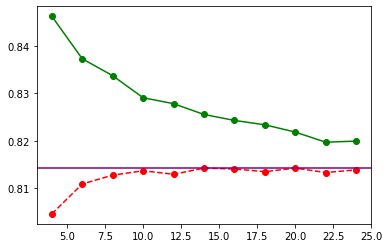

In [70]:
plt.plot(errors_dict['k_neighbors']['n_neighbors'], errors_dict['k_neighbors']['train_score'], color='green', marker='o', linestyle='solid')
plt.plot(errors_dict['k_neighbors']['n_neighbors'], errors_dict['k_neighbors']['test_score'], color='red', marker='o', linestyle='dashed')
plt.axhline(max(errors_dict['k_neighbors']['test_score']), color='purple')

In [71]:
max(errors_dict['k_neighbors']['test_score'])

0.8142644873699851

#### Вывод

Модель показала себя  достойно с 19 % ошибкой в лучшем случае. В initial версии показала показала себя лучше в плане точности предсказания (13 % ошибки). Возможно на результат повлиял отбор 20% от имеющегося датасета для более быстрых вычислений

### 9. Другие классификаторы

#### Линейный классификатор

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)

In [74]:
errors_dict['Linear Regression'] = dict()
errors_dict['Linear Regression']['train_score'] = train_score
errors_dict['Linear Regression']['test_score'] = test_score
errors = pd.concat([errors, pd.DataFrame(errors_dict['Linear Regression'], index=['Linear Regression'])], axis=0)
errors

train_score  test_score
k_neighbors, 4        0.846290    0.804606
k_neighbors, 6        0.837327    0.810921
k_neighbors, 8        0.833751    0.812779
k_neighbors, 10       0.829107    0.813707
k_neighbors, 12       0.827854    0.812964
k_neighbors, 14       0.825578    0.814264
k_neighbors, 16       0.824324    0.814079
k_neighbors, 18       0.823396    0.813522
k_neighbors, 20       0.821863    0.814264
k_neighbors, 22       0.819727    0.813336
k_neighbors, 24       0.819959    0.813893
Linear Regression     0.442936    0.430567

#### Случайный лес

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
pred = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)

In [77]:
errors_dict['Random Forest'] = dict()
errors_dict['Random Forest']['train_score'] = train_score
errors_dict['Random Forest']['test_score'] = test_score
errors = pd.concat([errors, pd.DataFrame(errors_dict['Random Forest'], index=['Random Forest'])], axis=0)
errors

train_score  test_score
k_neighbors, 4        0.846290    0.804606
k_neighbors, 6        0.837327    0.810921
k_neighbors, 8        0.833751    0.812779
k_neighbors, 10       0.829107    0.813707
k_neighbors, 12       0.827854    0.812964
k_neighbors, 14       0.825578    0.814264
k_neighbors, 16       0.824324    0.814079
k_neighbors, 18       0.823396    0.813522
k_neighbors, 20       0.821863    0.814264
k_neighbors, 22       0.819727    0.813336
k_neighbors, 24       0.819959    0.813893
Linear Regression     0.442936    0.430567
Random Forest         0.999954    1.000000

#### Вывод

Исходя из результатов тестирования, можно сделать вывод, что на данном датасете и при данной выборке Random Forest показывает себя лучше остальных классификаторов. На точность Random Forest возможно повлияла незначительная величина выборки

### 10. Несбалансированные классы

### 11. Корреляция

### 12. Вывод

Была проведена классификация датасета с метеорологическими данными Австралии с целью предсказывания статуса дождя на следующий день. В экспларационном анализе были выявлены переменные наиболее коррелирующие с таргетной, после чего было выполнено заполнение пропущенных значений, определение их типа а также конвертация категористических признаков в числовые. В заключительной части была выполнена классификация при помощи модели ближайших соседей и нескольких других классификаторов. KNN модель из данной работы показала себя хуже чем KNN модель из initial коммита с разницой в ошибке 6 % (19 % и 13 % соответственно). На данном датасете при данной выборке лучше всего продемонстрировала себя модель Random Forest с 100 % точностью

# Homework 1 FIX
## Timeseries data wrong train_test split (shuffling old with young data)

In [151]:
data_fixed.head()

day_sin   day_cos     month_sin  month_cos  year        Date Location  \
0 -0.478734  0.877960 -2.449294e-16        1.0  2008  01/12/2008   Albury   
1 -0.463550  0.886071 -2.449294e-16        1.0  2008  02/12/2008   Albury   
2 -0.448229  0.893919 -2.449294e-16        1.0  2008  03/12/2008   Albury   
3 -0.432776  0.901502 -2.449294e-16        1.0  2008  04/12/2008   Albury   
4 -0.417194  0.908818 -2.449294e-16        1.0  2008  05/12/2008   Albury   

   MinTemp  MaxTemp  Rainfall  ...  Humidity3pm  Pressure9am Pressure3pm  \
0     13.4     22.9       0.6  ...         22.0       1007.7      1007.1   
1      7.4     25.1       0.0  ...         25.0       1010.6      1007.8   
2     12.9     25.7       0.0  ...         30.0       1007.6      1008.7   
3      9.2     28.0       0.0  ...         16.0       1017.6      1012.8   
4     17.5     32.3       1.0  ...         33.0       1010.8      1006.0   

   Cloud9am Cloud3pm Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0       8.0      NaN    16.9     21.8        0.0      0.0           0.0  
1       NaN      NaN    17.2     24.3        0.0      0.0           0.0  
2       NaN      2.0    21.0     23.2        0.0      0.0           0.0  
3       NaN      NaN    18.1     26.5        0.0      1.0           0.0  
4       7.0      8.0    17.8     29.7        0.0      0.2           0.0  

[5 rows x 29 columns]

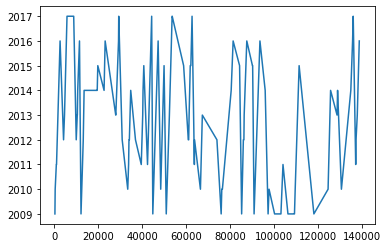

In [152]:
plt.plot(data_fixed['year'].sample(100, random_state=42).sort_index())

Как видно из графика, в датафрейме перемешаны даты, что может привести к последующим ошибкам при тренировке модели

In [153]:
data_fixed['Date'] = pd.to_datetime(data_fixed['Date'])
data_fixed['Date'].head()

0   2008-01-12
1   2008-02-12
2   2008-03-12
3   2008-04-12
4   2008-05-12
Name: Date, dtype: datetime64[ns]

In [154]:
data_fixed.set_index('Date', inplace=True)
data_fixed.sort_index(inplace=True)
data_fixed.head()

day_sin   day_cos     month_sin  month_cos  year  Location  \
Date                                                                      
2007-01-11 -0.858764  0.512371 -5.000000e-01   0.866025  2007  Canberra   
2007-01-12 -0.493776  0.869589 -2.449294e-16   1.000000  2007  Canberra   
2007-02-11 -0.849817  0.527078 -5.000000e-01   0.866025  2007  Canberra   
2007-02-12 -0.478734  0.877960 -2.449294e-16   1.000000  2007  Canberra   
2007-03-11 -0.840618  0.541628 -5.000000e-01   0.866025  2007  Canberra   

            MinTemp  MaxTemp  Rainfall  Evaporation  ...  Humidity3pm  \
Date                                                 ...                
2007-01-11      8.0     24.3       0.0          3.4  ...         29.0   
2007-01-12     15.1     20.4      22.6          2.4  ...         90.0   
2007-02-11     14.0     26.9       3.6          4.4  ...         36.0   
2007-02-12     11.6     26.3       4.2          1.6  ...         46.0   
2007-03-11     13.7     23.4       3.6          5.8  ...         69.0   

           Pressure9am  Pressure3pm Cloud9am Cloud3pm  Temp9am  Temp3pm  \
Date                                                                      
2007-01-11      1019.7       1015.0      7.0      7.0     14.4     23.6   
2007-01-12      1015.0       1014.1      8.0      8.0     17.0     16.3   
2007-02-11      1012.4       1008.4      5.0      3.0     17.5     25.7   
2007-02-12      1013.9       1009.5      2.0      2.0     16.7     25.2   
2007-03-11      1009.5       1007.2      8.0      7.0     15.4     20.2   

            RainToday  RISK_MM  RainTomorrow  
Date                                          
2007-01-11        0.0      3.6           1.0  
2007-01-12        1.0      4.2           1.0  
2007-02-11        1.0      3.6           1.0  
2007-02-12        1.0      0.2           0.0  
2007-03-11        1.0     39.8           1.0  

[5 rows x 28 columns]

In [155]:
data_fixed = data_fixed.reset_index()
data_fixed_date = data_fixed['Date']
data_fixed = data_fixed.drop('Date', axis=1)
data_fixed.head()

day_sin   day_cos     month_sin  month_cos  year  Location  MinTemp  \
0 -0.858764  0.512371 -5.000000e-01   0.866025  2007  Canberra      8.0   
1 -0.493776  0.869589 -2.449294e-16   1.000000  2007  Canberra     15.1   
2 -0.849817  0.527078 -5.000000e-01   0.866025  2007  Canberra     14.0   
3 -0.478734  0.877960 -2.449294e-16   1.000000  2007  Canberra     11.6   
4 -0.840618  0.541628 -5.000000e-01   0.866025  2007  Canberra     13.7   

   MaxTemp  Rainfall  Evaporation  ...  Humidity3pm Pressure9am  Pressure3pm  \
0     24.3       0.0          3.4  ...         29.0      1019.7       1015.0   
1     20.4      22.6          2.4  ...         90.0      1015.0       1014.1   
2     26.9       3.6          4.4  ...         36.0      1012.4       1008.4   
3     26.3       4.2          1.6  ...         46.0      1013.9       1009.5   
4     23.4       3.6          5.8  ...         69.0      1009.5       1007.2   

  Cloud9am Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0      7.0      7.0     14.4     23.6        0.0      3.6           1.0  
1      8.0      8.0     17.0     16.3        1.0      4.2           1.0  
2      5.0      3.0     17.5     25.7        1.0      3.6           1.0  
3      2.0      2.0     16.7     25.2        1.0      0.2           0.0  
4      8.0      7.0     15.4     20.2        1.0     39.8           1.0  

[5 rows x 28 columns]

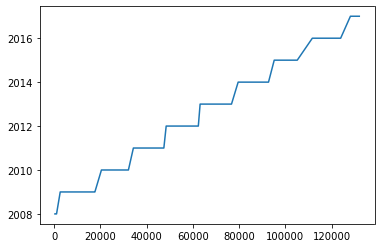

In [156]:
plt.plot(data_fixed['year'].sample(100, random_state=42).sort_index())

Отсортировали датафрейм по датам

In [157]:
data_fixed_Y = data_fixed['RainTomorrow']
data_fixed_X = data_fixed.drop('RainTomorrow', axis=1)

Разбивка на тренировочную, тестовую через классический sklearn, но без перемешивания

In [158]:
from sklearn.model_selection import train_test_split
data_fixed_train, data_fixed_test, _, _ = train_test_split(data_fixed_X, data_fixed_Y, test_size = 0.2, random_state = 42, shuffle=False)

print(data_fixed_train.shape, data_fixed_test.shape)

(107672, 27) (26918, 27)


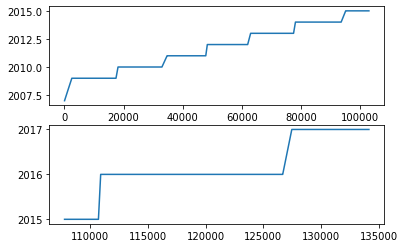

In [161]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(data_fixed_train['year'].sample(100, random_state=42).sort_index())
ax[1].plot(data_fixed_test['year'].sample(100, random_state=42).sort_index())

Разбивка на тренировочную, тестовую при помощи специальной функции (функция направлена на работу с подобными датасетами)

In [162]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tss.split(data_fixed_X):
    data_fixed_train, data_fixed_test = data_fixed_X.iloc[train_index, :], data_fixed_X.iloc[test_index,:]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print(data_fixed_train.shape, data_fixed_test.shape)

(100943, 27) (33647, 27)


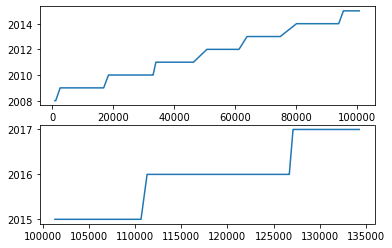

In [163]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(data_fixed_train['year'].sample(100, random_state=42).sort_index())
ax[1].plot(data_fixed_test['year'].sample(100, random_state=42).sort_index())

## Вывод

Исходя из графиков, можно сделать вывод, что датафрейм был разбит на тренировочную и тестовую выборки (в 2 методах) относительно таймфрейма успешно

# Homework 2

Возьмем уже имеющееся разделение на трейн / тест датасеты из прошлого дз

In [62]:
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

21534 5384 21534 5384


In [63]:
from sklearn.neural_network import MLPClassifier

Количество регуляризационных параметров и вариантов слоев нейронной сети было подобрано относительно времени тренировки сети (с целью его экономии)

In [93]:
%%time
layers = [(100, 50), (50, 25), (25, 10), (10, 5), (100,), (50,), (25,), (10,)]
alphas = np.logspace(-3, 2, 15)
scores = {
    'n_layers': [],
    'n_neurons': [],
    'alpha': [],
    'train_score': [],
    'test_score': []
}
count = 0
for layer in tqdm(layers, desc='mlp progress'):
    for alpha in tqdm(alphas, desc='cycle progress'):
        mlp_model = MLPClassifier(hidden_layer_sizes = layer,
                                  alpha = alpha,
                                  solver = 'lbfgs', 
                                  activation = 'logistic',
                                  max_iter = 1000,
                                  random_state = 42)
        mlp_model.fit(X_train, y_train)
        scores['n_layers'].append(len(layer))
        scores['n_neurons'].append(layer)
        scores['alpha'].append(alpha)
        scores['train_score'].append(mlp_model.score(X_train, y_train))
        scores['test_score'].append(mlp_model.score(X_test, y_test))

mlp progress:   0%|          | 0/8 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

cycle progress:   0%|          | 0/15 [00:00<?, ?it/s]

Wall time: 14min 51s


Посмотрим на зависимость ошибки от параметра регуляризации для однослойной и двухслойной сети.
Ошибки были усреднены по количеству вариаций слоев для каждого параметра альфа

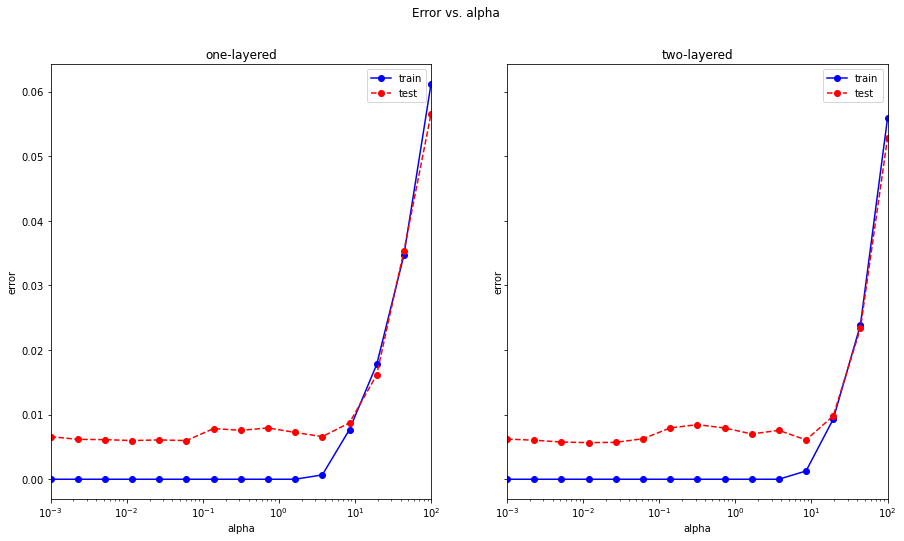

In [225]:
mean_error = {
    'one-layered': {
        'mean_train_error_by_alpha': [],
        'mean_test_error_by_alpha': []
    },
    'two-layered': {
        'mean_train_error_by_alpha': [],
        'mean_test_error_by_alpha': []
    }
}
for i in range(len(alphas)):
    mean_error['one-layered']['mean_train_error_by_alpha'].append(np.mean(1 - np.array(scores['train_score'])[np.array(scores['n_layers']) == 1][i::len(alphas)]))
    mean_error['one-layered']['mean_test_error_by_alpha'].append(np.mean(1 - np.array(scores['test_score'])[np.array(scores['n_layers']) == 1][i::len(alphas)]))
    mean_error['two-layered']['mean_train_error_by_alpha'].append(np.mean(1 - np.array(scores['train_score'])[np.array(scores['n_layers']) > 1][i::len(alphas)]))
    mean_error['two-layered']['mean_test_error_by_alpha'].append(np.mean(1 - np.array(scores['test_score'])[np.array(scores['n_layers']) > 1][i::len(alphas)]))
    
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Mean. Error vs. alpha')
for i, layer in enumerate(['one-layered', 'two-layered']):
    ax[i].semilogx(alphas, mean_error[layer]['mean_train_error_by_alpha'], 'b-o', label = 'train')
    ax[i].semilogx(alphas, mean_error[layer]['mean_test_error_by_alpha'], 'r--o', label = 'test')
    ax[i].set_xlim([np.min(alphas), np.max(alphas)])
    ax[i].set_title(layer)
    ax[i].set_xlabel('alpha')
    ax[i].set_ylabel('error')
    ax[i].legend()

Также посмотрим на зависимость относительно фиксированной нейронной сети

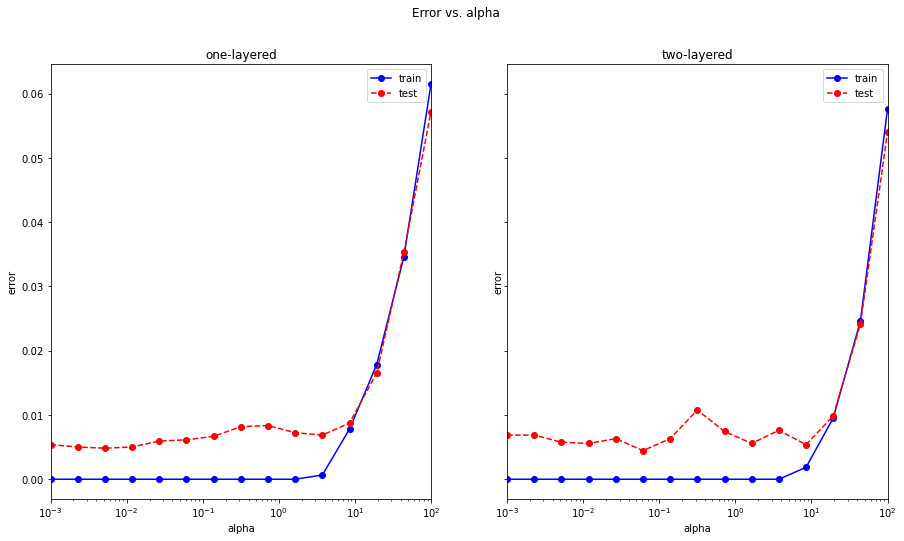

In [321]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Error vs. alpha')
for i, layer in enumerate(['one-layered', 'two-layered']):
    ax[i].semilogx(alphas, 1 - np.array(scores['train_score'])[np.array(scores['n_layers']) == (i+1)][:len(alphas)], 'b-o', label = 'train')
    ax[i].semilogx(alphas, 1 - np.array(scores['test_score'])[np.array(scores['n_layers']) == (i+1)][:len(alphas)], 'r--o', label = 'test')
    ax[i].set_xlim([np.min(alphas), np.max(alphas)])
    ax[i].set_title(layer)
    ax[i].set_xlabel('alpha')
    ax[i].set_ylabel('error')
    ax[i].legend()

Из графика видно, что после достижения оптимального значения alpha, модель начинает недообучаться вследствие завышенного значения параметра регуляризации

In [241]:
tr_sc = np.array(scores['train_score'])
t_sc = np.array(scores['test_score'])
one_l = np.array(scores['n_layers']) == 1
two_l = np.array(scores['n_layers']) > 1
print('one-layered min error (train, test, optimal alpha): ',
      1 - np.max(tr_sc[one_l]),
      ', ',
      1 - np.max(t_sc[one_l]),
      ', ',
      alphas[np.where(t_sc[one_l] == np.max(t_sc[one_l]))[0][0] % len(alphas)],
      '\n',
      'two-layered min error (train, test, optimal alpha): ',
      1 - np.max(tr_sc[two_l]),
      ', ',
      1 - np.max(t_sc[two_l]),
      ', ',
      alphas[np.where(t_sc[two_l] == np.max(t_sc[two_l]))[0][0] % len(alphas)],
     sep='')

one-layered min error (train, test, optimal alpha): 0.0, 0.004086181277860312, 0.0610540229658533
two-layered min error (train, test, optimal alpha): 0.0, 0.0024145616641901846, 0.02682695795279726


По аналогии с параметром alpha, были усреднены значения ошибок нейронных сетей относительно вариации количества нейронов в слоях. При сравнении в 2-ух слоевой нейронной сети нейроны будут употреблены в единственном значении (без акцента на последовательность слоя), т.е слои (100, 50) будут иметь значение 150 на графике

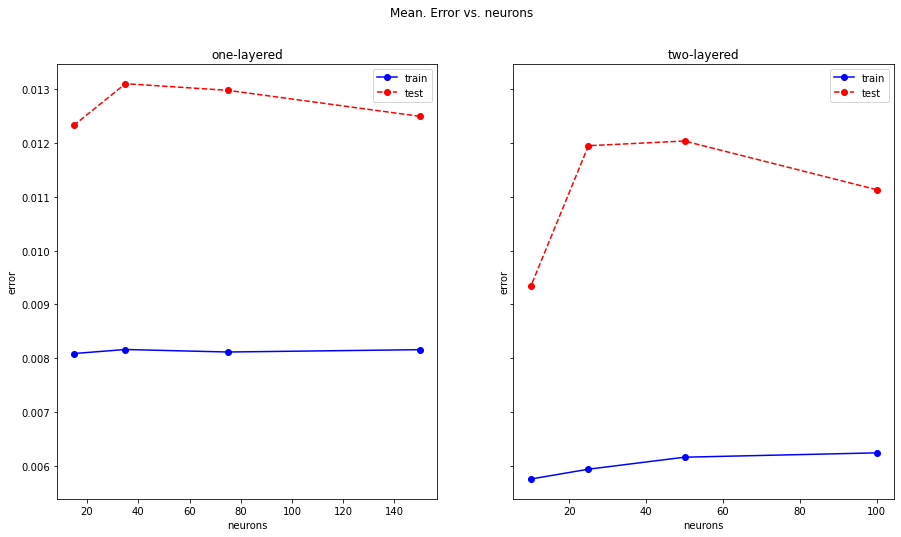

In [337]:
mean_error = {
    'one-layered': {
        'mean_train_error_by_neurons': [],
        'mean_test_error_by_neurons': []
    },
    'two-layered': {
        'mean_train_error_by_neurons': [],
        'mean_test_error_by_neurons': []
    }
}
neurons = [np.sum(i) for i in scores['n_neurons'][::len(alphas)]]
for i in range(len(neurons) // 2):
    mean_error['one-layered']['mean_train_error_by_neurons'].append(np.mean(1 - np.array(scores['train_score'])[np.array(scores['n_layers']) == 1][i*len(alphas):(i+1)*len(alphas)]))
    mean_error['one-layered']['mean_test_error_by_neurons'].append(np.mean(1 - np.array(scores['test_score'])[np.array(scores['n_layers']) == 1][i*len(alphas):(i+1)*len(alphas)]))
    mean_error['two-layered']['mean_train_error_by_neurons'].append(np.mean(1 - np.array(scores['train_score'])[np.array(scores['n_layers']) > 1][i*len(alphas):(i+1)*len(alphas)]))
    mean_error['two-layered']['mean_test_error_by_neurons'].append(np.mean(1 - np.array(scores['test_score'])[np.array(scores['n_layers']) > 1][i*len(alphas):(i+1)*len(alphas)]))
    
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Mean. Error vs. neurons')
for i, layer in enumerate(['one-layered', 'two-layered']):
    ax[i].plot(neurons[i*len(neurons)//2:(i+1)*len(neurons)//2], mean_error[layer]['mean_train_error_by_neurons'], 'b-o', label = 'train')
    ax[i].plot(neurons[i*len(neurons)//2:(i+1)*len(neurons)//2], mean_error[layer]['mean_test_error_by_neurons'], 'r--o', label = 'test')
    ax[i].set_title(layer)
    ax[i].set_xlabel('neurons')
    ax[i].set_ylabel('error')
    ax[i].legend()

Также посмотрим на зависимость относительно фиксированного альфа

<ipython-input-336-bc54f5c44c4c>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nn_mask = np.full(np.array(scores['n_neurons']).shape, False)


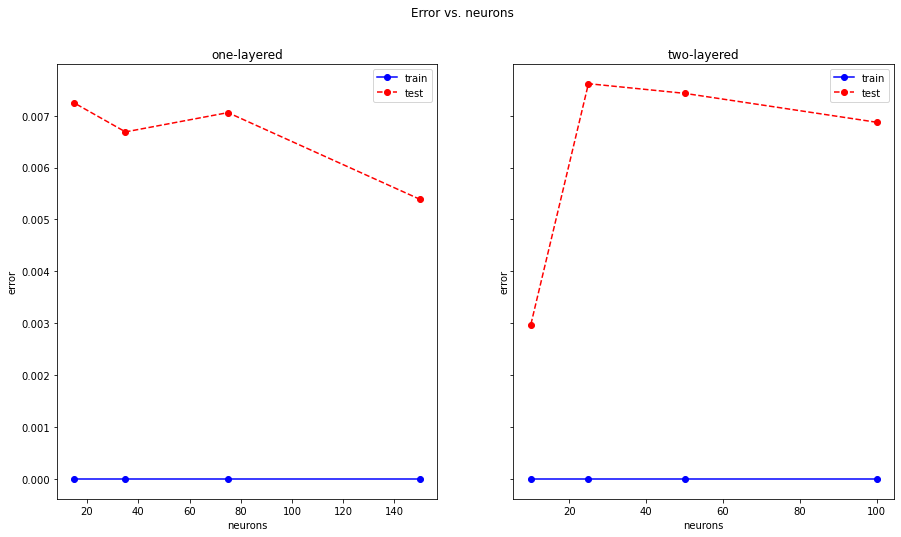

In [336]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Error vs. neurons')
nn_mask = np.full(np.array(scores['n_neurons']).shape, False)
nn_mask[::len(alphas)] = True
for i, layer in enumerate(['one-layered', 'two-layered']):
    ax[i].plot(neurons[i*len(neurons)//2:(i+1)*len(neurons)//2], 1 - np.array(scores['train_score'])[np.logical_and(nn_mask, np.array(scores['n_layers']) == (i+1))], 'b-o', label = 'train')
    ax[i].plot(neurons[i*len(neurons)//2:(i+1)*len(neurons)//2], 1 - np.array(scores['test_score'])[np.logical_and(nn_mask, np.array(scores['n_layers']) == (i+1))], 'r--o', label = 'test')
    ax[i].set_title(layer)
    ax[i].set_xlabel('neurons')
    ax[i].set_ylabel('error')
    ax[i].legend()

Из графиков средних значений и фиксированного alpha заметно, что они достаточно сильно противоречат друг другу на однослойной нейронной сети и похожи на двуслойной. На среднем значении наблюдается достижение оптимального значения ошибки на минимальном количестве используемых нейронов. В фиксированном же ситуация полностью противоположна. Скорее всего данная ситуация вызвана недостаточным значением параметра регуляризации alpha фиксированной нейронной сети (модель переобучается). Увелечение нейронов также в краткосрочной перспективе в среднем дает переобучение. Достижение более оптимального значения при большем количестве нейронов возможно при достижении достаточного времени (при больших данных данное времи возможно сильно скалируется в сравнении с малым числом нейронов)

In [243]:
tr_sc = np.array(scores['train_score'])
t_sc = np.array(scores['test_score'])
one_l = np.array(scores['n_layers']) == 1
two_l = np.array(scores['n_layers']) > 1
print('one-layered min error (train, test, optimal neurons): ',
      1 - np.max(tr_sc[one_l]),
      ', ',
      1 - np.max(t_sc[one_l]),
      ', ',
      neurons[np.where(t_sc[one_l] == np.max(t_sc[one_l]))[0][0] % len(neurons)],
      '\n',
      'two-layered min error (train, test, optimal neurons): ',
      1 - np.max(tr_sc[two_l]),
      ', ',
      1 - np.max(t_sc[two_l]),
      ', ',
      neurons[np.where(t_sc[two_l] == np.max(t_sc[two_l]))[0][0] % len(neurons)],
     sep='')

one-layered min error (train, test, optimal neurons): 0.0, 0.004086181277860312, 35
two-layered min error (train, test, optimal neurons): 0.0, 0.0024145616641901846, 75


Для данного датасета и выбранных гиперпараметров оптимальное значение достигается при 35 и 75 нейронах. Скорее всего на данный результат повлияла комбинация из правильно подобранной регуляризации alpha и достаточного количества нейронов (чтобы компенсировать переобучение модели на большем количестве нейронов засчет параметра регуляризации)